In [1]:
from google.colab import files
import pandas as pd
df = pd.read_csv('/content/Life Expectancy at Birth.csv')
print(df.head())
print(df.info())
print(df.describe())
uploaded = files.upload()

  ISO3               Country Continent           Hemisphere  \
0  AFG           Afghanistan      Asia  Northern Hemisphere   
1  AGO                Angola    Africa  Southern Hemisphere   
2  ALB               Albania    Europe  Northern Hemisphere   
3  AND               Andorra    Europe  Northern Hemisphere   
4  ARE  United Arab Emirates      Asia  Northern Hemisphere   

  Human Development Groups UNDP Developing Regions  HDI Rank (2021)  \
0                      Low                      SA            180.0   
1                   Medium                     SSA            148.0   
2                     High                     ECA             67.0   
3                Very High                     NaN             40.0   
4                Very High                      AS             26.0   

   Life Expectancy at Birth (1990)  Life Expectancy at Birth (1991)  \
0                          45.9672                          46.6631   
1                          41.8933                  

In [4]:
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ISO3                               195 non-null    object 
 1   Country                            195 non-null    object 
 2   Continent                          195 non-null    object 
 3   Hemisphere                         195 non-null    object 
 4   Human Development Groups           191 non-null    object 
 5   UNDP Developing Regions            151 non-null    object 
 6   HDI Rank (2021)                    195 non-null    float64
 7   Life Expectancy at Birth (1990)    195 non-null    float64
 8   Life Expectancy at Birth (1991)    195 non-null    float64
 9   Life Expectancy at Birth (1992)    195 non-null    float64
 10  Life Expectancy at Birth (1993)    195 non-null    float64
 11  Life Expectancy at Birth (1994)    195 non-null    float64

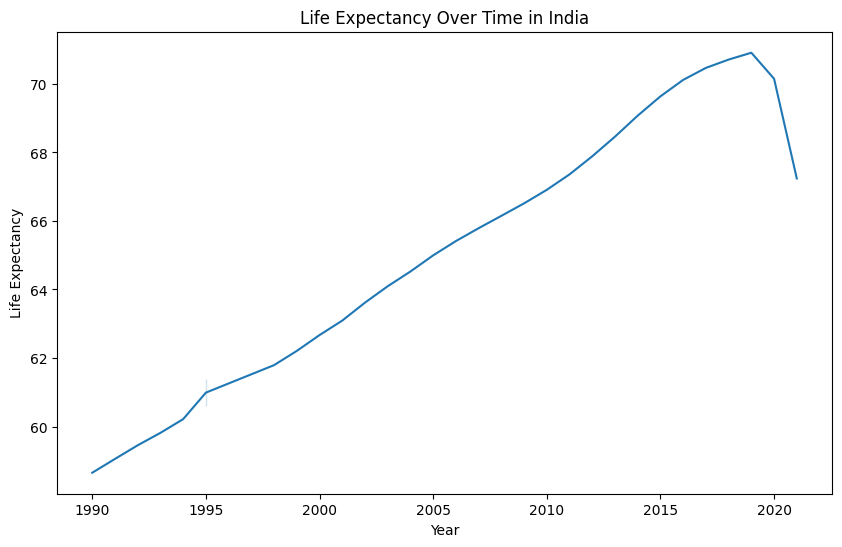

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = pd.melt(df, id_vars=['Country'],
                    value_vars=[col for col in df.columns if 'Life Expectancy at Birth' in col],
                    var_name='Year', value_name='Life Expectancy')

df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted[df_melted['Country'] == 'India'], x='Year', y='Life Expectancy')
plt.title('Life Expectancy Over Time in India')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

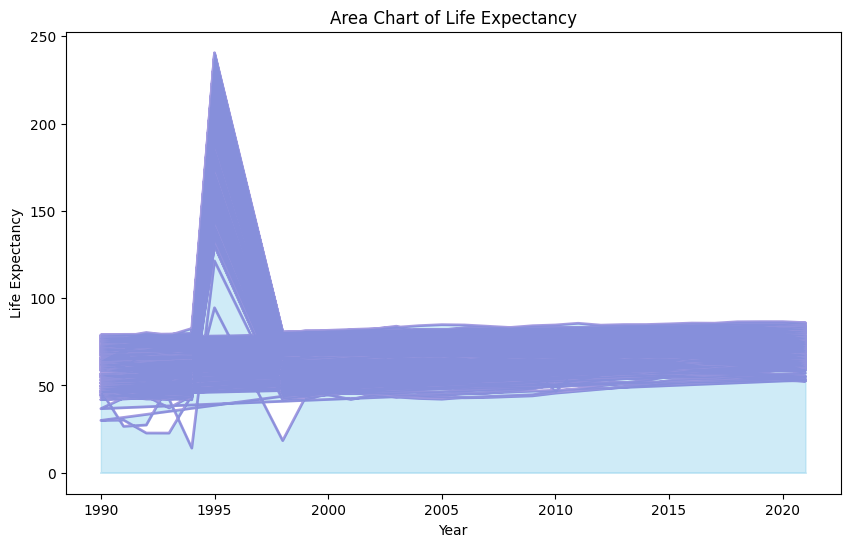

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_melted = pd.melt(df, id_vars=['Country'],
                    value_vars=[col for col in df.columns if 'Life Expectancy at Birth' in col],
                    var_name='Year', value_name='Life Expectancy')

df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

df_grouped = df_melted.groupby(['Country', 'Year']).sum().reset_index()

plt.figure(figsize=(10,6))
plt.fill_between(df_grouped['Year'], df_grouped['Life Expectancy'], color="skyblue", alpha=0.4)
plt.plot(df_grouped['Year'], df_grouped['Life Expectancy'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Area Chart of Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()


#Tree map



In [10]:
import plotly.express as px

df_melted = pd.melt(df, id_vars=['Country'],
                    value_vars=[col for col in df.columns if 'Life Expectancy at Birth' in col],
                    var_name='Year', value_name='Life Expectancy')

df_melted['Year'] = df_melted['Year'].str.extract('(\d{4})').astype(int)

fig = px.treemap(df_melted, path=['Country'], values='Life Expectancy',
                 color='Life Expectancy', hover_data=['Year'])
fig.show()

# Waterfall chart


<ipython-input-11-60068c2c93bc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



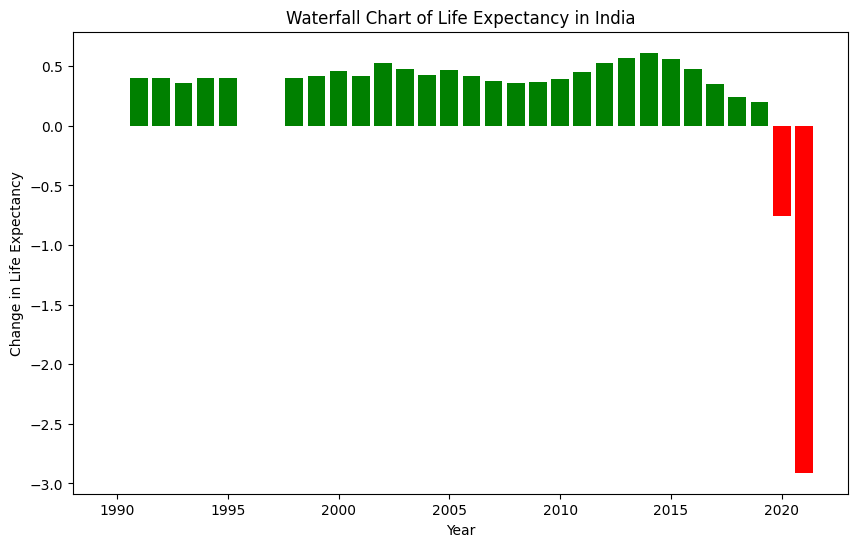

In [11]:
df_country = df_melted[df_melted['Country'] == 'India']
df_country['Diff'] = df_country['Life Expectancy'].diff()

plt.figure(figsize=(10,6))
plt.bar(df_country['Year'], df_country['Diff'].fillna(0),
        color=['green' if x > 0 else 'red' for x in df_country['Diff']])
plt.title('Waterfall Chart of Life Expectancy in India')
plt.xlabel('Year')
plt.ylabel('Change in Life Expectancy')
plt.show()


# Funnel chart



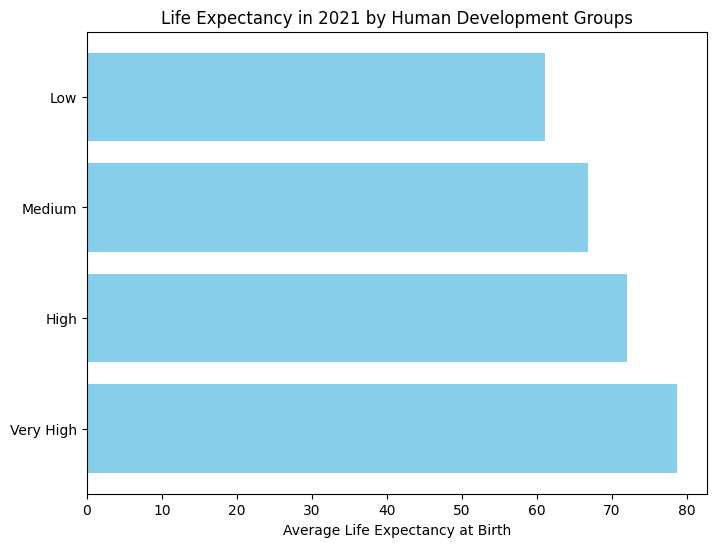

In [15]:
funnel_data = df.groupby('Human Development Groups')['Life Expectancy at Birth (2021)'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(funnel_data.index, funnel_data, color='skyblue')
ax.set_title('Life Expectancy in 2021 by Human Development Groups')
ax.set_xlabel('Average Life Expectancy at Birth')
plt.show()

# Donut Chart

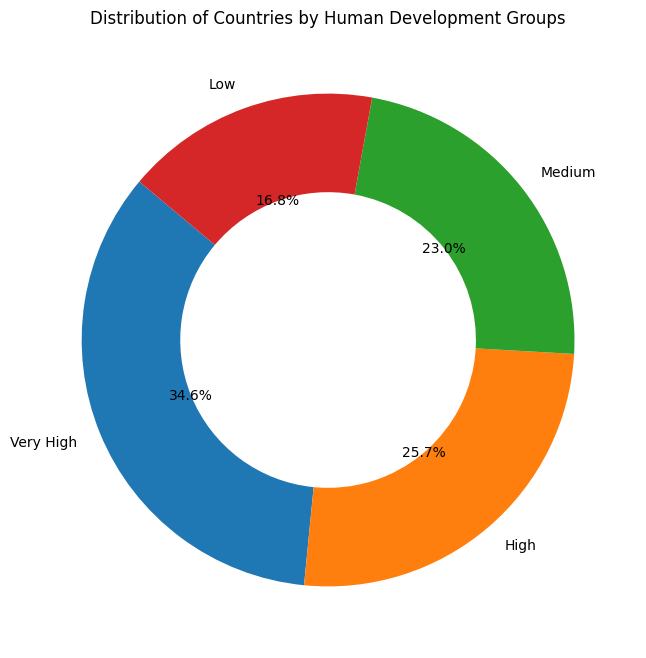

In [16]:
hdi_groups = df['Human Development Groups'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(hdi_groups, labels=hdi_groups.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})
ax.set_title('Distribution of Countries by Human Development Groups')
plt.show()